### WordCloud of sleep text scores

In [12]:
%%bash
sudo apt update
sudo apt install fonts-ipaexfont  # for Japanese in wordcloud

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 128 kB in 2s (75.4 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
52 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
fonts-ipaexfo



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)




In [13]:
!pip install wordcloud
!pip install japanize-matplotlib  # for Japanese in matplotlib graph

#### Import libraries  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib  # for Japanese in matplotlib graph
from wordcloud import WordCloud, STOPWORDS

#### Setup working directory

In [15]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Documents/ds2024/dsF1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Documents/ds2024/dsF1


#### Parameters  

In [16]:
csv_in = 'sleep-text-score-wakati.csv'

#### Read CSV file  

In [17]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(426, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               426 non-null    object
 1   GPT-4o             426 non-null    int64 
 2   Gemini-1.5-Pro     426 non-null    int64 
 3   Claude-3.5-Sonnet  426 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.4+ KB
None


text  GPT-4o  Gemini-1.5-Pro  Claude-3.5-Sonnet
0           就寝 時間 毎日 一定 する       2               2                  2
1               朝日 積極的 浴びる       2               2                  2
2         寝室 温度 18 -22度 保つ       2               2                  2
3  就寝 前 ストレッチ 体 リラックス さ せる       2               2                  2
4             寝具 定期的 清潔 保つ       2               2                  2

#### Check the number of documents in each category  

In [18]:
print(df['Gemini-1.5-Pro'].value_counts().sort_index(ascending=True))

Gemini-1.5-Pro
0    182
1     75
2    169
Name: count, dtype: int64


#### Generating WordCloud

In [19]:
fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

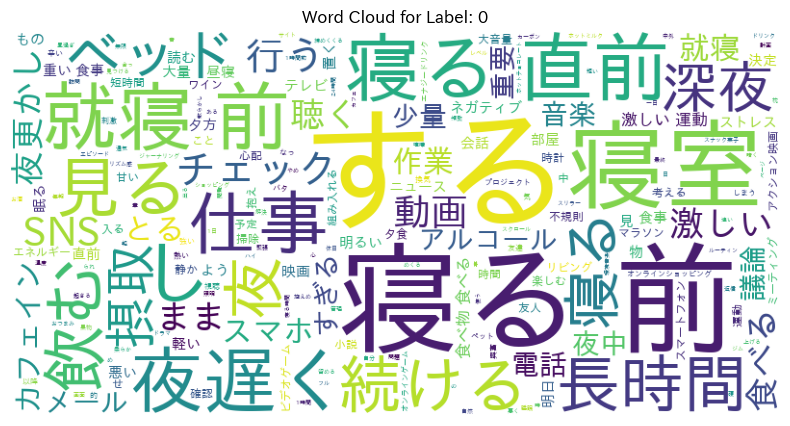

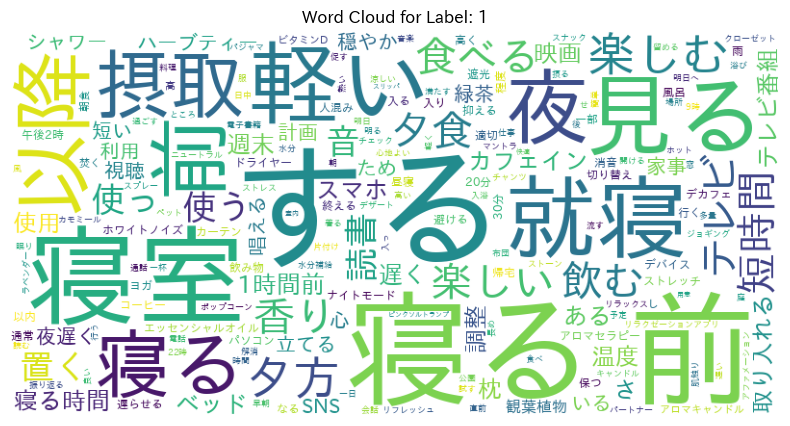

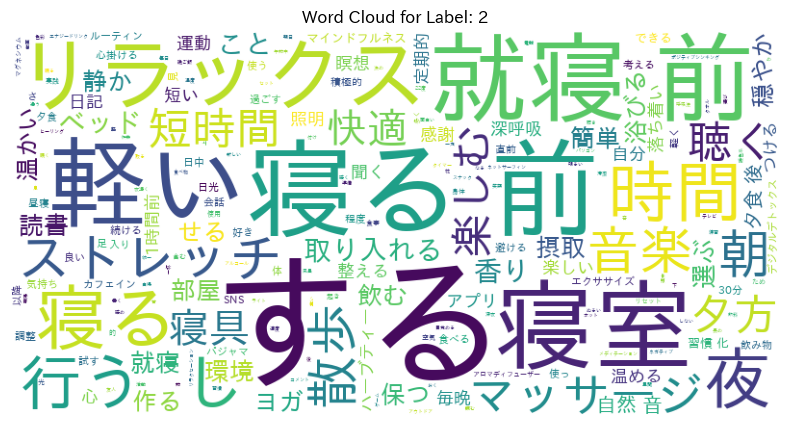

In [20]:
sorted_labels = sorted(df['Gemini-1.5-Pro'].unique())

for label in sorted_labels:
    text_data = df[df['Gemini-1.5-Pro'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

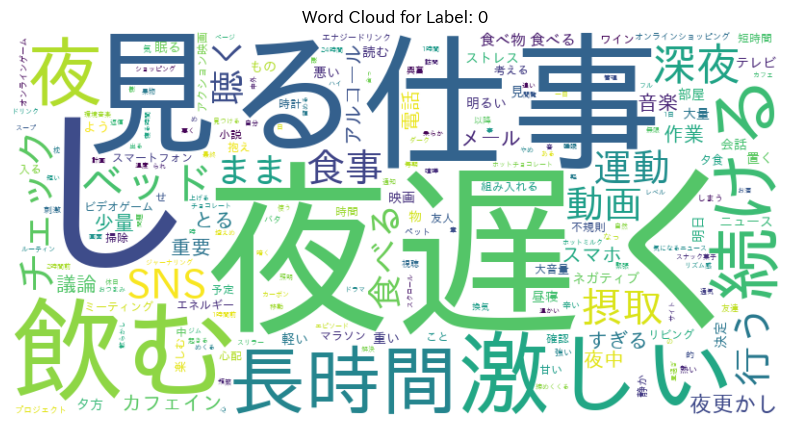

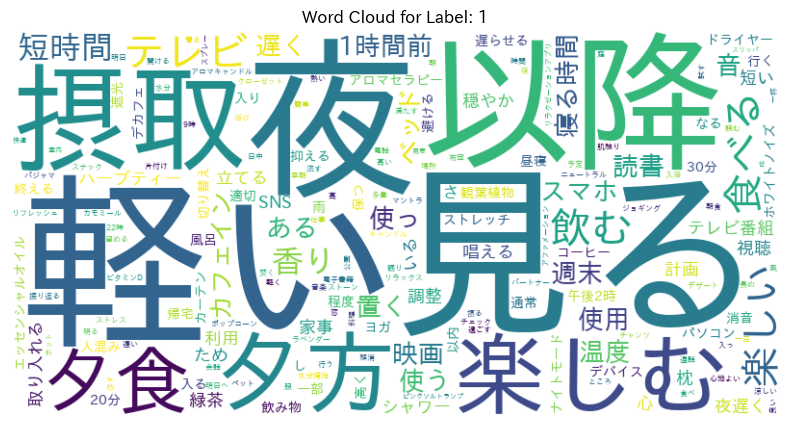

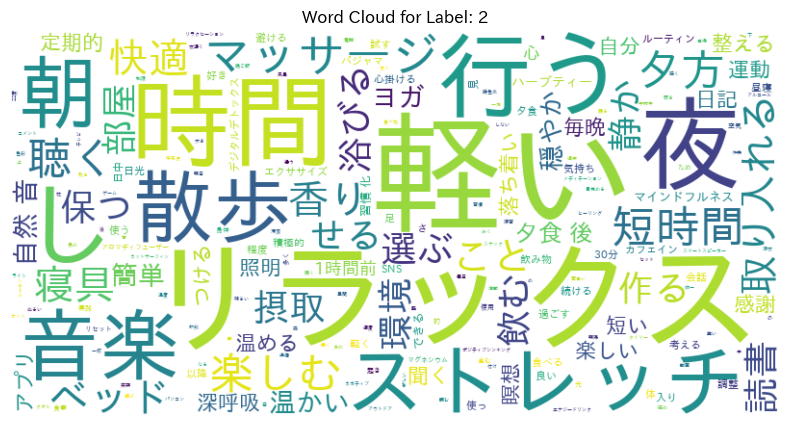

In [21]:
excluded_words = set(['寝る', '前', '直前', 'する', '就寝', '寝室'])

sorted_labels = sorted(df['Gemini-1.5-Pro'].unique())

for label in sorted_labels:
    text_data = df[df['Gemini-1.5-Pro'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath, stopwords=STOPWORDS.union(excluded_words)).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

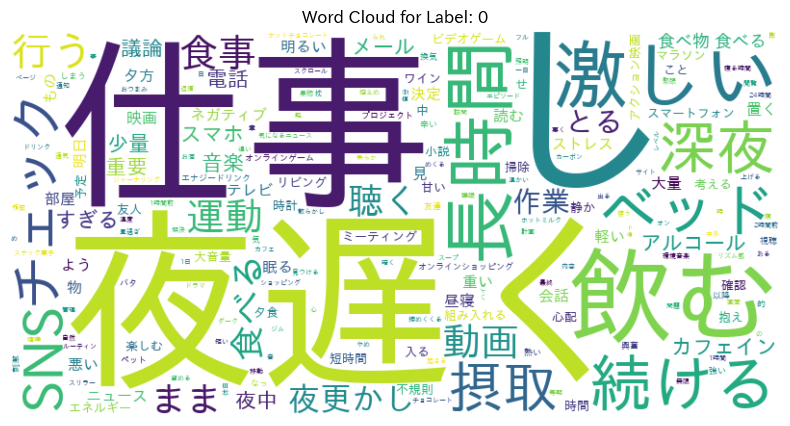

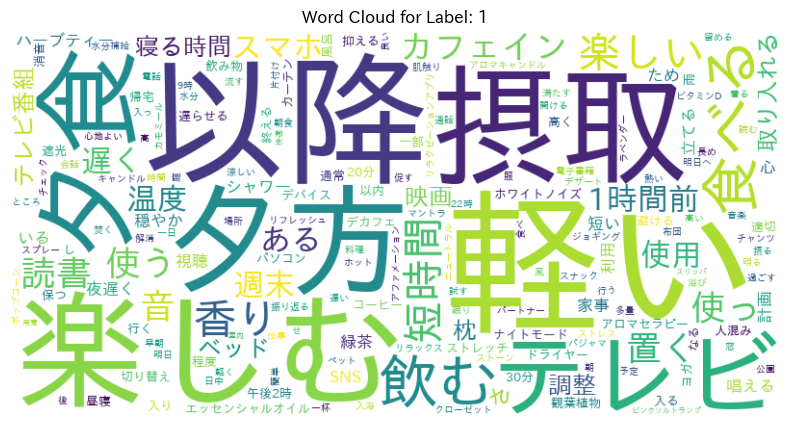

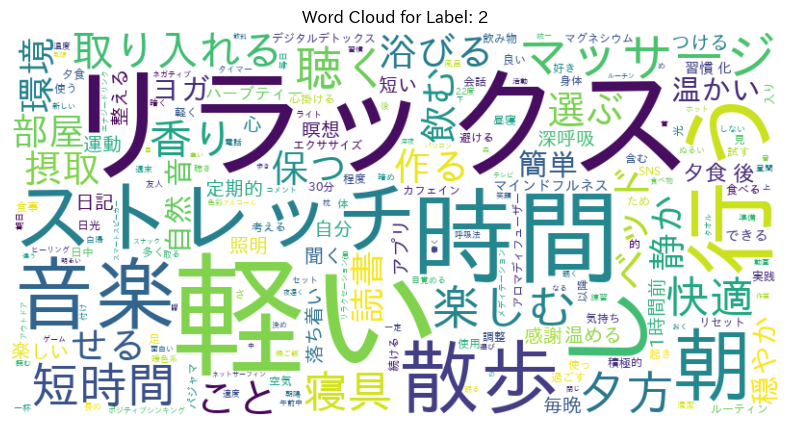

In [22]:
excluded_words = set(['寝る', '前', '直前', 'する', '就寝', '寝室', '夜', '見る'])

sorted_labels = sorted(df['Gemini-1.5-Pro'].unique())

for label in sorted_labels:
    text_data = df[df['Gemini-1.5-Pro'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath, stopwords=STOPWORDS.union(excluded_words)).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

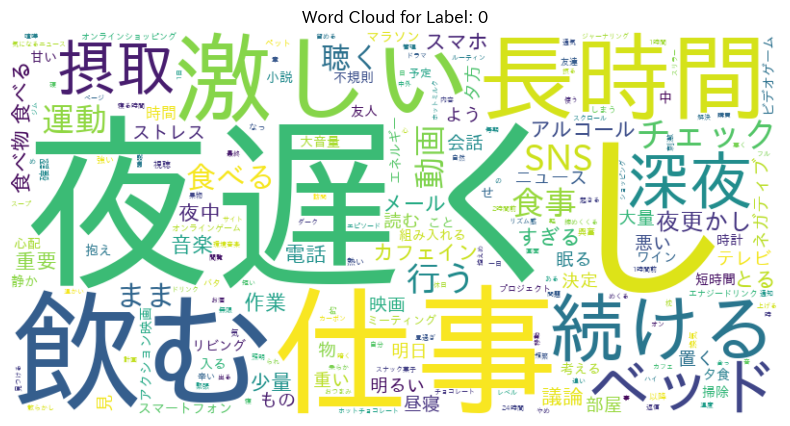

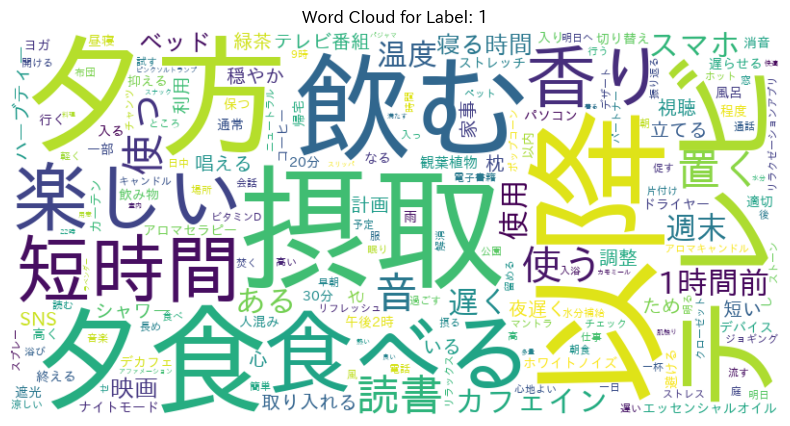

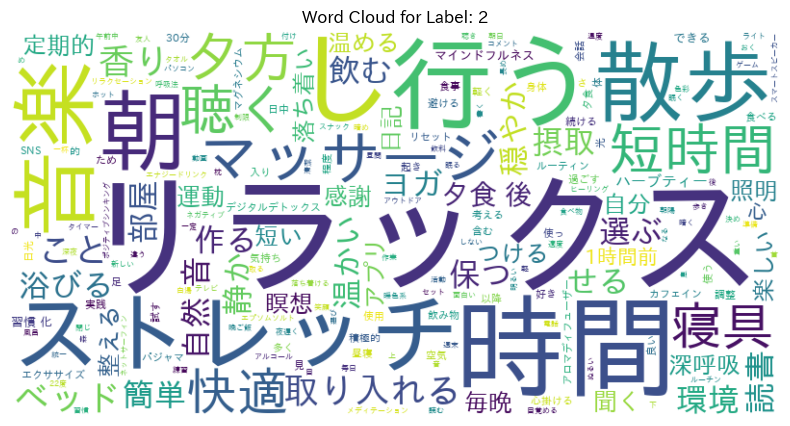

In [23]:
excluded_words = set(['寝る', '前', '直前', 'する', '就寝', '寝室', '夜', '見る', '軽い', '楽しむ'])

sorted_labels = sorted(df['Gemini-1.5-Pro'].unique())

for label in sorted_labels:
    text_data = df[df['Gemini-1.5-Pro'] == label]['text'].str.cat(sep=' ')

    wc = WordCloud(width=800, height=400, background_color='white',
                   font_path=fpath, stopwords=STOPWORDS.union(excluded_words)).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()